<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Title......
#@markdown Introduction to topic.........
%%capture
!git clone https://github.com/EvenSol/NeqSim-Colab.git
!cd NeqSim-Colab
!pip install NeqSim-Colab/lib/neqsim-*.whl
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

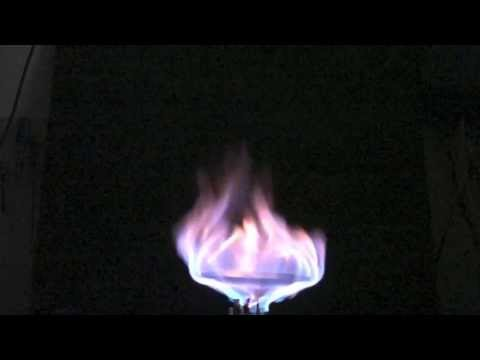

In [0]:
#@title  Title......
#@markdown Introduction to topic......... and to Utube video....
from IPython.display import YouTubeVideo
YouTubeVideo('3zU6pfFq9V0', width=600, height=400)

In [0]:
#@title  Calculation title....
#@markdown Introduction and descirption of the calculation.......
#@markdown Documentation of how to use form.......
#@markdown Script is replaced with new code... 

from neqsim.thermo import fluid, TPflash
from neqsim.standards import ISO6976

nitrogen = 1.0 #@param {type:"number"}
CO2 = 0.0001 #@param {type:"number"}
methane = 88.3  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  1.5 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
ipentane =  0.25 #@param {type:"number"}
npentane =  0.25 #@param {type:"number"}
nhexane =  0.1 #@param {type:"number"}

fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-butane", nbutane)
fluid1.addComponent("i-pentane", ipentane)
fluid1.addComponent("n-pentane", npentane)
fluid1.addComponent("n-hexane", nhexane)

TPflash(fluid1)
